In [2]:
import pandas as pd
import numpy as np

import scipy.stats as ss
import statsmodels.api as sm
import statsmodels.formula.api as smf

from statsmodels.stats.api import anova_lm
from statsmodels.stats.multicomp import (pairwise_tukeyhsd, MultiComparison)

import pingouin as pg

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
photo = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-k-alibekov/personal/csv_files/5_task_1.csv')

In [6]:
photo

,id,group,events
0,16046,A,14
1,18712,A,41
2,3268,A,30
3,22633,A,37
4,28071,A,38
...,...,...,...
29995,22932,C,38
29996,21787,C,25
29997,5054,C,34
29998,10254,C,27


### Создаю отсортированные ряды для последующих тестов

In [9]:
A = photo.query('group == "A"').events
B = photo.query('group == "B"').events
C = photo.query('group == "C"').events

### Проверка являются ли дисперсии внутри групп одинаковыми

In [13]:
ss.levene(A, B, C)

LeveneResult(statistic=2.2622596339318037, pvalue=0.1041327199523974)

In [14]:
pg.homoscedasticity(data=photo, dv='events', group='group')

,W,pval,equal_var
levene,2.26226,0.104133,True


### Проверка на нормальность распределения внутри групп

In [15]:
print(ss.shapiro(A))
print(ss.shapiro(B))
print(ss.shapiro(C))

ShapiroResult(statistic=0.9989418387413025, pvalue=4.318870651331963e-06)
ShapiroResult(statistic=0.9990161061286926, pvalue=1.0504894817131571e-05)
ShapiroResult(statistic=0.9989210963249207, pvalue=3.3885160064528463e-06)


/opt/tljh/user/lib/python3.7/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [16]:
print(ss.normaltest(A))
print(ss.normaltest(B))
print(ss.normaltest(C))

NormaltestResult(statistic=2.1034599402238734, pvalue=0.3493328906085719)
NormaltestResult(statistic=0.8410715800223014, pvalue=0.6566948749848232)
NormaltestResult(statistic=3.243725809054571, pvalue=0.19753037588314626)


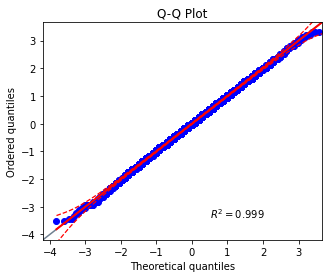

In [17]:
pg.qqplot(A)

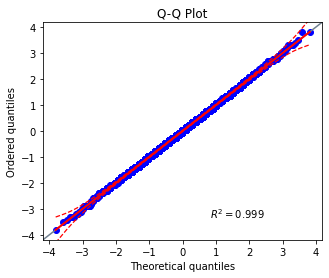

In [18]:
pg.qqplot(B)

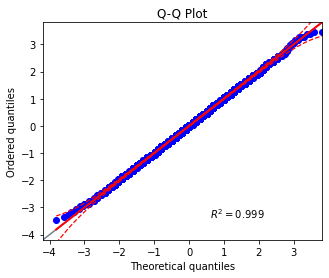

In [19]:
pg.qqplot(C)

### Однофакторный дисперсионный анализ / ANOVA

In [22]:
ss.f_oneway(A, B, C)

F_onewayResult(statistic=2886.166657438961, pvalue=0.0)

#### межгрупповая дисперсия примерно в 2886 раз больше, чем внутригрупповая
#### красная, зеленая и голубая группа между собой различаются, так как pvalue < 0.05

### Множественные сравнения

In [23]:
pg.pairwise_tukey(data=photo, dv='events', between='group')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,A,B,29.5796,37.6136,-8.0340,0.140894,-57.021604,0.001,-0.806377
1,A,C,29.5796,27.4703,2.1093,0.140894,14.970833,0.001,0.211712
2,B,C,37.6136,27.4703,10.1433,0.140894,71.992436,0.001,1.018089


#### между всеми группами есть статистически значимые различия

In [24]:
pg.pairwise_ttests(data=photo, dv='events', between='group')

/opt/tljh/user/lib/python3.7/site-packages/pingouin/bayesian.py:146: RuntimeWarning: divide by zero encountered in double_scalars
  bf10 = 1 / ((1 + t**2 / df)**(-(df + 1) / 2) / integr)


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,group,A,B,False,True,-57.011134,19998.0,two-sided,0.000000e+00,inf,-0.806229
1,group,A,C,False,True,14.886135,19998.0,two-sided,7.500262e-50,1.054e+46,0.210514
2,group,B,C,False,True,72.420220,19998.0,two-sided,0.000000e+00,inf,1.024138


In [25]:
pg.pairwise_ttests(data=photo, dv='events', between='group', padjust = 'bonf')

/opt/tljh/user/lib/python3.7/site-packages/pingouin/bayesian.py:146: RuntimeWarning: divide by zero encountered in double_scalars
  bf10 = 1 / ((1 + t**2 / df)**(-(df + 1) / 2) / integr)


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,group,A,B,False,True,-57.011134,19998.0,two-sided,0.000000e+00,0.000000e+00,bonf,inf,-0.806229
1,group,A,C,False,True,14.886135,19998.0,two-sided,7.500262e-50,2.250078e-49,bonf,1.054e+46,0.210514
2,group,B,C,False,True,72.420220,19998.0,two-sided,0.000000e+00,0.000000e+00,bonf,inf,1.024138


In [30]:
pairwise_tukeyhsd(photo.events, photo.group).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
A,B,8.034,0.001,7.7038,8.3642,True
A,C,-2.1093,0.001,-2.4395,-1.7791,True
B,C,-10.1433,0.001,-10.4735,-9.8131,True


In [31]:
button = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-k-alibekov/personal/csv_files/5_task_2.csv')

In [32]:
button

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0
...,...,...,...,...
99995,60695,control,low,15.0
99996,5934,control,low,16.0
99997,30046,control,low,22.0
99998,26474,control,low,21.0


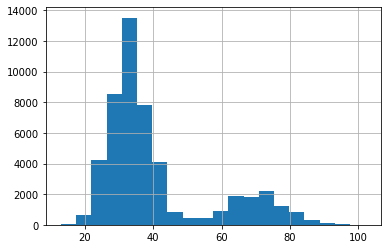

In [40]:
button.query("group == 'test'").events.hist(bins=20)

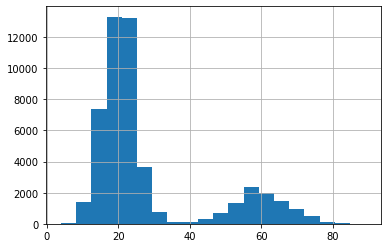

In [37]:
button.query("group == 'control'").events.hist(bins=20)

In [43]:
button.query("group == 'test'").groupby('segment').events.describe()

,count,mean,std,min,25%,50%,75%,max
segment,,,,,,,,
high,10000.0,69.938500,8.403974,40.0,64.0,70.0,76.0,102.0
low,40000.0,33.025925,5.720845,13.0,29.0,33.0,37.0,59.0


In [44]:
button.query("group == 'control'").groupby('segment').events.describe()

,count,mean,std,min,25%,50%,75%,max
segment,,,,,,,,
high,10000.0,59.970800,7.805347,31.0,55.0,60.0,65.0,89.0
low,40000.0,20.031575,4.473576,4.0,17.0,20.0,23.0,41.0


In [50]:
model = smf.ols('events ~ segment*group', data=button).fit()
anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
segment,2.362480e+07,1.0,689756.377484,0.000000e+00
group,3.837195e+06,1.0,112031.864119,0.000000e+00
segment:group,3.664244e+04,1.0,1069.823273,2.060261e-233
Residual,3.424956e+06,99996.0,NaN,NaN


In [51]:
button['combination'] = button['group'] + ' \ ' + button['segment']

In [52]:
button.head()

,id,group,segment,events,combination
0,83440,test,high,78.0,test \ high
1,96723,test,high,71.0,test \ high
2,68719,test,high,80.0,test \ high
3,50399,test,high,80.0,test \ high
4,95613,test,high,78.0,test \ high


In [53]:
MultiComparison(button.events, button.combination).tukeyhsd().summary()

group1,group2,meandiff,p-adj,lower,upper,reject
control \ high,control \ low,-39.9392,0.001,-40.1073,-39.7711,True
control \ high,test \ high,9.9677,0.001,9.7551,10.1803,True
control \ high,test \ low,-26.9449,0.001,-27.113,-26.7768,True
control \ low,test \ high,49.9069,0.001,49.7388,50.075,True
control \ low,test \ low,12.9944,0.001,12.888,13.1007,True
test \ high,test \ low,-36.9126,0.001,-37.0807,-36.7445,True


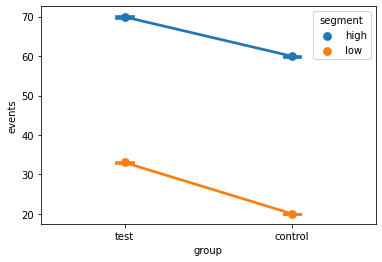

In [54]:
sns.pointplot(x='group', y='events', hue='segment', data=button, capsize=0.1)